In [1]:
# load Packages
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline

In [2]:
# Read the data
bank = pd.read_csv('~/ADAN8888/data/raw/bank_raw.csv')

In [3]:
# Data Exploration 

In [4]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank.shape

(10000, 14)

In [6]:
# check data info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check the unique values for each column
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# check missing values
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts','Balance', 'EstimatedSalary'
bank[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [10]:
# Data Visulization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

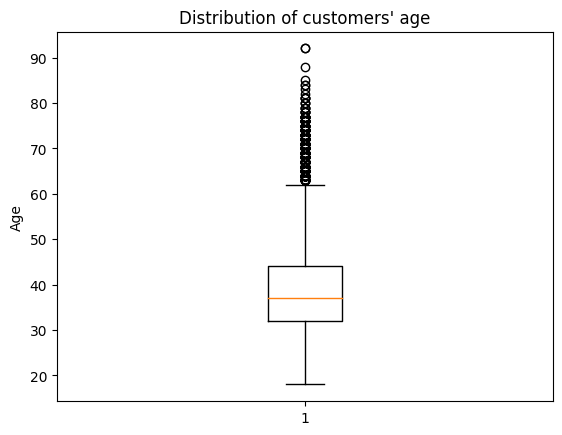

In [12]:
plt.boxplot(bank['Age'])
plt.title("Distribution of customers' age")
plt.ylabel('Age')
plt.show()

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

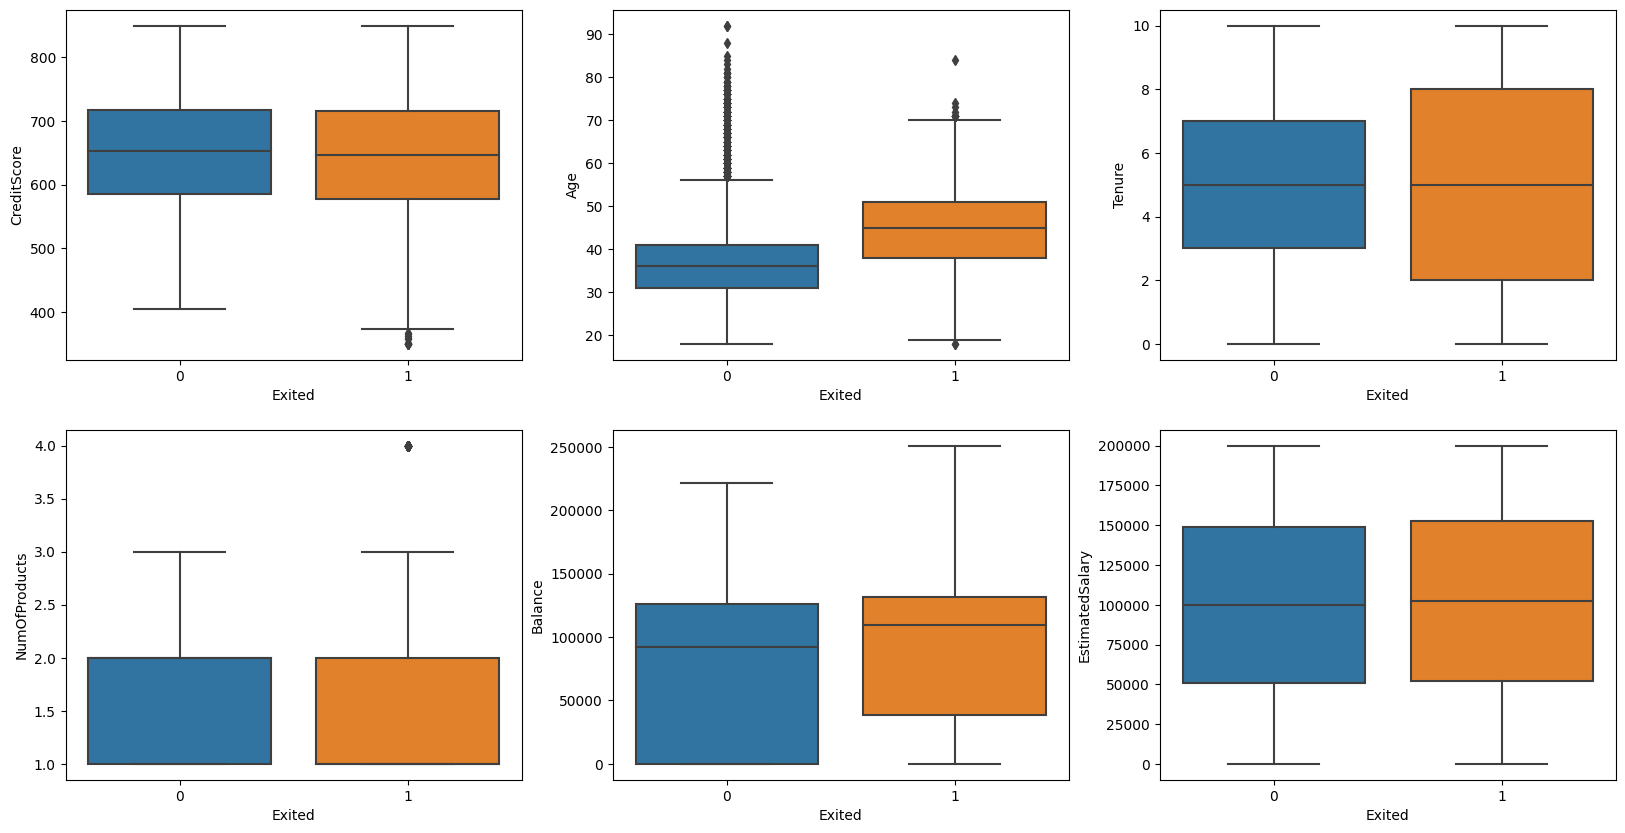

In [13]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=bank, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=bank, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=bank, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=bank, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=bank, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=bank, ax=axss[1][2])

Text(0.5, 0.98, 'Analysis of Customer Churn by Categorical Features')

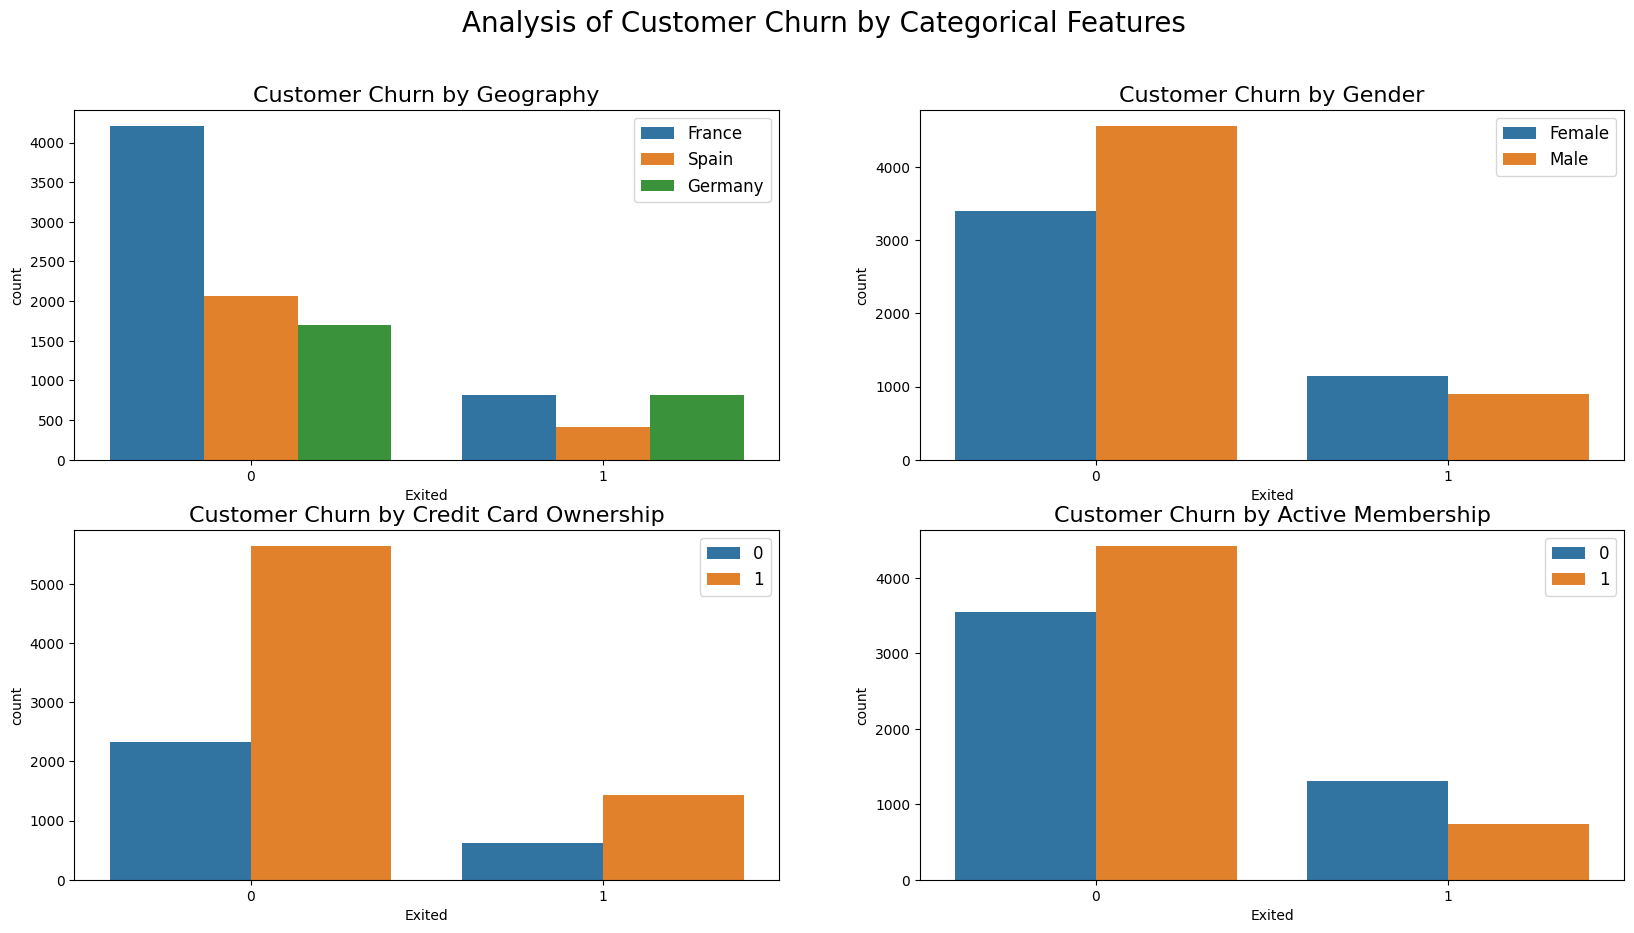

In [14]:
fig, axs = plt.subplots(2,2, figsize=[20,10])

sns.countplot(x='Exited', hue='Geography', data=bank, ax=axs[0][0])
axs[0][0].legend(fontsize=12)
axs[0][0].set_title("Customer Churn by Geography", fontsize=16)

sns.countplot(x='Exited', hue='Gender', data=bank, ax=axs[0][1])
axs[0][1].legend(fontsize=12)
axs[0][1].set_title("Customer Churn by Gender", fontsize=16)

sns.countplot(x='Exited', hue='HasCrCard', data=bank, ax=axs[1][0])
axs[1][0].legend(fontsize=12)
axs[1][0].set_title("Customer Churn by Credit Card Ownership", fontsize=16)

sns.countplot(x='Exited', hue='IsActiveMember', data=bank, ax=axs[1][1])
axs[1][1].legend(fontsize=12)
axs[1][1].set_title("Customer Churn by Active Membership", fontsize=16)

fig.suptitle("Analysis of Customer Churn by Categorical Features", fontsize=20)

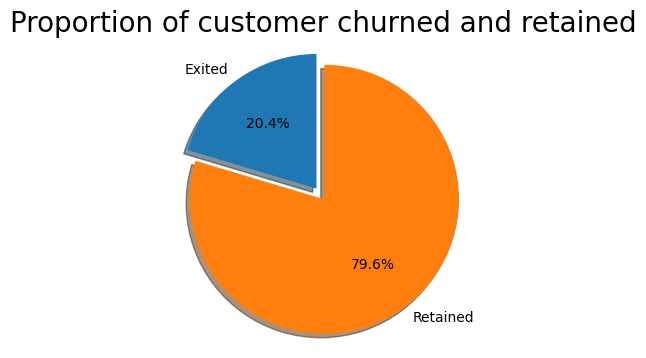

In [15]:
# Proportion of customer churned and Retained
labels = 'Exited', 'Retained'
sizes = [bank.Exited[bank['Exited']==1].count(), bank.Exited[bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [16]:
# Feature Engineering

In [17]:
# Drop useless features
bank1 = bank.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [18]:
bank1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
# Get target variable
y = bank1['Exited']

In [20]:
# Convert categorical varaiables to numerical variables
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bank1['Gender']= lb.fit_transform(bank1['Gender'])

In [21]:
bank1 = pd.get_dummies(bank1, columns = ['Geography'])

In [22]:
X = bank1.drop(['Exited'], axis = 1)

In [23]:
# Data Spliting

In [24]:
# Split the data into training and testing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

In [25]:
# Split the training set into training and validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [26]:
# Building Models----Logistic Regression, Random Forest, XGBoost

In [27]:
# Logistic Regression with 3 variations

# Variation 1: Logistic Regression without hyperparameters tuning
# Variation 2: Logistic Regression with L1 penalty
# Variation 3: Logistic Regression with L2 penalty 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Variation 1 Logistic Regression without hyperparameters tuning

In [30]:
# Define the base model
model1 = LogisticRegression(random_state=42)

In [31]:
# Train the base model
model1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
# Make predictions on the training set
y_train_pred = model1.predict(X_train)

In [33]:
# Calculate performance metrics on the training set
train_acc1 = accuracy_score(y_train, y_train_pred)
train_prec1 = precision_score(y_train, y_train_pred, average='macro')
train_rec1 = recall_score(y_train, y_train_pred, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred, average='macro')

In [34]:
# Make predictions on the validation set
y_val_pred = model1.predict(X_val)

In [35]:
# Calculate performance metrics on the validation set
val_acc1 = accuracy_score(y_val, y_val_pred)
val_prec1 = precision_score(y_val, y_val_pred, average='macro')
val_rec1 = recall_score(y_val, y_val_pred, average='macro')
val_f1_1 = f1_score(y_val, y_val_pred, average='macro')

In [36]:
# variation 2 Logistic Regression with L1 penalty 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [39]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [40]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8103124999999999
Best parameters set:
C:0.2
penalty:l1


In [41]:
# Best LR
model2 = Grid_LR.best_estimator_

In [42]:
# Make predictions on the training set
y_train_pred2 = model2.predict(X_train)

In [43]:
# Calculate performance metrics on the training set
train_acc2 = accuracy_score(y_train, y_train_pred2)
train_prec2 = precision_score(y_train, y_train_pred2, average='macro')
train_rec2 = recall_score(y_train, y_train_pred2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred2, average='macro')

In [44]:
# Make predictions on the validation set
y_val_pred2 = model2.predict(X_val)

In [45]:
# Calculate performance metrics on the validation set
val_acc2 = accuracy_score(y_val, y_val_pred2)
val_prec2 = precision_score(y_val, y_val_pred2, average='macro')
val_rec2 = recall_score(y_val, y_val_pred2, average='macro')
val_f1_2 = f1_score(y_val, y_val_pred2, average='macro')

In [46]:
# variation 3 Logistic Regression with l2 penalty 

In [47]:
model3 = LogisticRegression(penalty='l2', C=0.2, random_state=42)

In [48]:
model3.fit(X_train, y_train)

LogisticRegression(C=0.2, random_state=42)

In [49]:
# Make predictions on the training set
y_train_pred3 = model3.predict(X_train)

In [50]:
# Calculate performance metrics on the training set
train_acc3 = accuracy_score(y_train, y_train_pred3)
train_prec3 = precision_score(y_train, y_train_pred3, average='macro')
train_rec3 = recall_score(y_train, y_train_pred3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred3, average='macro')

In [51]:
# Make predictions on the validation set
y_val_pred3 = model3.predict(X_val)

In [52]:
# Calculate performance metrics on the validation set
val_acc3 = accuracy_score(y_val, y_val_pred3)
val_prec3 = precision_score(y_val, y_val_pred3, average='macro')
val_rec3 = recall_score(y_val, y_val_pred3, average='macro')
val_f1_3 = f1_score(y_val, y_val_pred3, average='macro')

In [53]:
# Create a table to compare the performance metrics of the three models
table = pd.DataFrame({
    'Model': ['Logistic Regression (base)', 'Logistic Regression (L1 Penalty)', 'Logistic Regression(L2 Penalty)'],
    'Train Accuracy': [train_acc1, train_acc2, train_acc3],
    'Train Precision': [train_prec1, train_prec2, train_prec3],
    'Train Recall': [train_rec1, train_rec2, train_rec3],
    'Train F1-Score': [train_f1_1, train_f1_2, train_f1_3],
    'Validation Accuracy': [val_acc1, val_acc2, val_acc3],
    'Validation Precision': [val_prec1, val_prec2, val_prec3],
    'Validation Recall': [val_rec1, val_rec2, val_rec3],
    'Validation F1-Score': [val_f1_1, val_f1_2, val_f1_3]
})

# Set the model column as the index
table.set_index('Model', inplace=True)

# Print the table
print(table)

                                  Train Accuracy  Train Precision  \
Model                                                               
Logistic Regression (base)              0.786719          0.58652   
Logistic Regression (L1 Penalty)        0.811719          0.72654   
Logistic Regression(L2 Penalty)         0.786719          0.58652   

                                  Train Recall  Train F1-Score  \
Model                                                            
Logistic Regression (base)             0.51525        0.486678   
Logistic Regression (L1 Penalty)       0.58837        0.602146   
Logistic Regression(L2 Penalty)        0.51525        0.486678   

                                  Validation Accuracy  Validation Precision  \
Model                                                                         
Logistic Regression (base)                   0.789375              0.593567   
Logistic Regression (L1 Penalty)             0.812500              0.725072   
Logisti

In [54]:
# Random Forest with 3 variations

# Variation 1: Random Forest without hyperparameters tuning
# Variation 2: Random Forest with hyperparamters tuing 
# Variation 3: Random Forest with samller trees

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# variation 1: Random Forest without hyperparameters tuning

In [57]:
# Define the base model
model4 = RandomForestClassifier(random_state=42)

In [58]:
# Train the base model
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Make predictions on the training set
y_train_pred4 = model4.predict(X_train)

In [60]:
# Calculate performance metrics on the training set
train_acc4 = accuracy_score(y_train, y_train_pred4)
train_prec4 = precision_score(y_train, y_train_pred4, average='macro')
train_rec4 = recall_score(y_train, y_train_pred4, average='macro')
train_f1_4 = f1_score(y_train, y_train_pred4, average='macro')

In [61]:
# Make predictions on the validation set
y_val_pred4 = model4.predict(X_val)

In [62]:
# Calculate performance metrics on the validation set
val_acc4 = accuracy_score(y_val, y_val_pred4)
val_prec4 = precision_score(y_val, y_val_pred4, average='macro')
val_rec4 = recall_score(y_val, y_val_pred4, average='macro')
val_f1_4 = f1_score(y_val, y_val_pred4, average='macro')

In [63]:
# variation 2: Random Forest with hyperparameters tuning

In [64]:
# Define the tuned model
parameters = {'n_estimators':[60, 80, 100], 'max_depth':[1, 5, 10]}
RF_model2 = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5)

In [65]:
# Train the tuned model
RF_model2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [66]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
# best number of tress
print_grid_search_metrics(RF_model2)

Best score: 0.8612499999999998
Best parameters set:
max_depth:10
n_estimators:80


In [67]:
# best random forest
model5 = RF_model2.best_estimator_

In [68]:
model5

RandomForestClassifier(max_depth=10, n_estimators=80, random_state=42)

In [69]:
# Make predictions on the training set
y_train_pred5 = model5.predict(X_train)

In [70]:
# Calculate performance metrics on the training set
train_acc5 = accuracy_score(y_train, y_train_pred5)
train_prec5 = precision_score(y_train, y_train_pred5, average='macro')
train_rec5 = recall_score(y_train, y_train_pred5, average='macro')
train_f1_5 = f1_score(y_train, y_train_pred5, average='macro')

In [71]:
# Make predictions on the validation set
y_val_pred5 = model5.predict(X_val)

In [72]:
# Calculate performance metrics on the validation set
val_acc5 = accuracy_score(y_val, y_val_pred5)
val_prec5 = precision_score(y_val, y_val_pred5, average='macro')
val_rec5 = recall_score(y_val, y_val_pred5, average='macro')
val_f1_5 = f1_score(y_val, y_val_pred5, average='macro')

In [73]:
# variation 3: Random Forest with smaller-trees 

In [74]:
model6 = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

In [75]:
# Train the small-trees model
model6.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [76]:
# Make predictions on the training set
y_train_pred6 = model6.predict(X_train)

In [77]:
# Calculate performance metrics on the training set
train_acc6 = accuracy_score(y_train, y_train_pred6)
train_prec6 = precision_score(y_train, y_train_pred6, average='macro')
train_rec6 = recall_score(y_train, y_train_pred6, average='macro')
train_f1_6 = f1_score(y_train, y_train_pred6, average='macro')

In [78]:
# Make predictions on the validation set
y_val_pred6 = model6.predict(X_val)

In [79]:
# Calculate performance metrics on the validation set
val_acc6 = accuracy_score(y_val, y_val_pred6)
val_prec6 = precision_score(y_val, y_val_pred6, average='macro')
val_rec6 = recall_score(y_val, y_val_pred6, average='macro')
val_f1_6 = f1_score(y_val, y_val_pred6, average='macro')

In [80]:
# Create a table to compare the performance metrics of the three models
table = pd.DataFrame({
    'Model': ['Random Forest (base)', 'Random Forest (tuned)', 'Random Forest (small trees)'],
    'Train Accuracy': [train_acc4, train_acc5, train_acc6],
    'Train Precision': [train_prec4, train_prec5, train_prec6],
    'Train Recall': [train_rec4, train_rec5, train_rec6],
    'Train F1-Score': [train_f1_4, train_f1_5, train_f1_6],
    'Validation Accuracy': [val_acc4, val_acc5, val_acc6],
    'Validation Precision': [val_prec4, val_prec5, val_prec6],
    'Validation Recall': [val_rec4, val_rec5, val_rec6],
    'Validation F1-Score': [val_f1_4, val_f1_5, val_f1_6]
})

# Set the model column as the index
table.set_index('Model', inplace=True)

# Print the table
print(table)

                             Train Accuracy  Train Precision  Train Recall  \
Model                                                                        
Random Forest (base)               0.999844         0.999902      0.999620   
Random Forest (tuned)              0.902656         0.923887      0.773885   
Random Forest (small trees)        0.833594         0.847013      0.609174   

                             Train F1-Score  Validation Accuracy  \
Model                                                              
Random Forest (base)               0.999761             0.860625   
Random Forest (tuned)              0.821528             0.863125   
Random Forest (small trees)        0.632358             0.831250   

                             Validation Precision  Validation Recall  \
Model                                                                  
Random Forest (base)                     0.818546           0.712427   
Random Forest (tuned)                    0.835563   

In [81]:
# XGBoost with 3 variations

# Variation 1: XGBoost without hyperparameters tuning (default parameters)
# Variation 2: XGBoost with decreased learning_rate to 0.1 and max_depth to 5
# variation 3: XGBoost with decreased n_estimators to 140 and max_depths to 3

In [82]:
import xgboost as xgb

In [83]:
# variation 1: XGBoost without hyperparameters tuning (default: max_depth = 6, min_child_weight = 1, learning_rate =0.3)

In [84]:
model7 = xgb.XGBClassifier()

In [85]:
# Train the base model
model7.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
# Make predictions on the training set
y_train_pred7 = model7.predict(X_train)

In [87]:
# Calculate performance metrics on the training set
train_acc7 = accuracy_score(y_train, y_train_pred7)
train_prec7 = precision_score(y_train, y_train_pred7, average='macro')
train_rec7 = recall_score(y_train, y_train_pred7, average='macro')
train_f1_7 = f1_score(y_train, y_train_pred7, average='macro')

In [88]:
# Make predictions on the validation set
y_val_pred7 = model7.predict(X_val)

In [89]:
# Calculate performance metrics on the validation set
val_acc7 = accuracy_score(y_val, y_val_pred7)
val_prec7 = precision_score(y_val, y_val_pred7, average='macro')
val_rec7 = recall_score(y_val, y_val_pred7, average='macro')
val_f1_7 = f1_score(y_val, y_val_pred7, average='macro')

In [90]:
# variation 2: XGBoost with decreased learning_rate to 0.1 and max_depth to 5

In [91]:
model8 = xgb.XGBClassifier(
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [92]:
# Train the model
model8.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [93]:
# Make predictions on the training set
y_train_pred8 = model8.predict(X_train)

In [94]:
# Calculate performance metrics on the training set
train_acc8 = accuracy_score(y_train, y_train_pred8)
train_prec8 = precision_score(y_train, y_train_pred8, average='macro')
train_rec8 = recall_score(y_train, y_train_pred8, average='macro')
train_f1_8 = f1_score(y_train, y_train_pred8, average='macro')

In [95]:
# Make predictions on the validation set
y_val_pred8 = model8.predict(X_val)

In [96]:
# Calculate performance metrics on the validation set
val_acc8 = accuracy_score(y_val, y_val_pred8)
val_prec8 = precision_score(y_val, y_val_pred8, average='macro')
val_rec8 = recall_score(y_val, y_val_pred8, average='macro')
val_f1_8 = f1_score(y_val, y_val_pred8, average='macro')

In [97]:
# variation 3: XGBoost with decreased n_estimators to 140 and max_depths to 3

In [98]:
model9 = xgb.XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                         min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, random_state=42)

In [99]:
# train the model
model9.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [100]:
# Make predictions on the training set
y_train_pred9 = model9.predict(X_train)

In [101]:
# Calculate performance metrics on the training set
train_acc9 = accuracy_score(y_train, y_train_pred9)
train_prec9 = precision_score(y_train, y_train_pred9, average='macro')
train_rec9 = recall_score(y_train, y_train_pred9, average='macro')
train_f1_9 = f1_score(y_train, y_train_pred9, average='macro')

In [102]:
# Make predictions on the validation set
y_val_pred9 = model9.predict(X_val)

In [103]:
# Calculate performance metrics on the validation set
val_acc9 = accuracy_score(y_val, y_val_pred9)
val_prec9 = precision_score(y_val, y_val_pred9, average='macro')
val_rec9 = recall_score(y_val, y_val_pred9, average='macro')
val_f1_9 = f1_score(y_val, y_val_pred9, average='macro')

In [104]:
# Create a table to compare the performance metrics of the three models
table = pd.DataFrame({
    'Model': ['Default hyperparameters', 
              'Decreased learning_rate and max_depth', 
              'Decreased n_estimators and Decreased more in max_depth'],
    'Train Accuracy': [train_acc7, train_acc8, train_acc9],
    'Train Precision': [train_prec7, train_prec8, train_prec9],
    'Train Recall': [train_rec7, train_rec8, train_rec9],
    'Train F1-Score': [train_f1_7, train_f1_8, train_f1_9],
    'Validation Accuracy': [val_acc7, val_acc8, val_acc9],
    'Validation Precision': [val_prec7, val_prec8, val_prec9],
    'Validation Recall': [val_rec7, val_rec8, val_rec9],
    'Validation F1-Score': [val_f1_7, val_f1_8, val_f1_9]
})

# Set the model column as the index
table.set_index('Model', inplace=True)

# Print the table
print(table)

                                                    Train Accuracy  \
Model                                                                
Default hyperparameters                                   0.965000   
Decreased learning_rate and max_depth                     0.998437   
Decreased n_estimators and Decreased more in ma...        0.878594   

                                                    Train Precision  \
Model                                                                 
Default hyperparameters                                    0.969479   
Decreased learning_rate and max_depth                      0.999018   
Decreased n_estimators and Decreased more in ma...         0.858901   

                                                    Train Recall  \
Model                                                              
Default hyperparameters                                 0.922553   
Decreased learning_rate and max_depth                   0.996203   
Decreased n_estimator

In [105]:
# Model Evaluation and Comparison

In [106]:
np.random.seed(42)

models = [model1, model2, model3, model4, model5, model6, model7, model8, model9]

# Train the models and calculate their accuracy on the validation set
train_errors = []
val_errors = []
model_names = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    val_error = 1 - accuracy_score(y_val, y_pred_val)
    train_errors.append(train_error)
    val_errors.append(val_error)
    model_names.append(type(model).__name__)
    print(f"{type(model).__name__} Validation Error: {val_error:.4f}")


LogisticRegression Validation Error: 0.2106
LogisticRegression Validation Error: 0.1875
LogisticRegression Validation Error: 0.2106
RandomForestClassifier Validation Error: 0.1394
RandomForestClassifier Validation Error: 0.1369
RandomForestClassifier Validation Error: 0.1687
XGBClassifier Validation Error: 0.1400
XGBClassifier Validation Error: 0.1488
XGBClassifier Validation Error: 0.1356


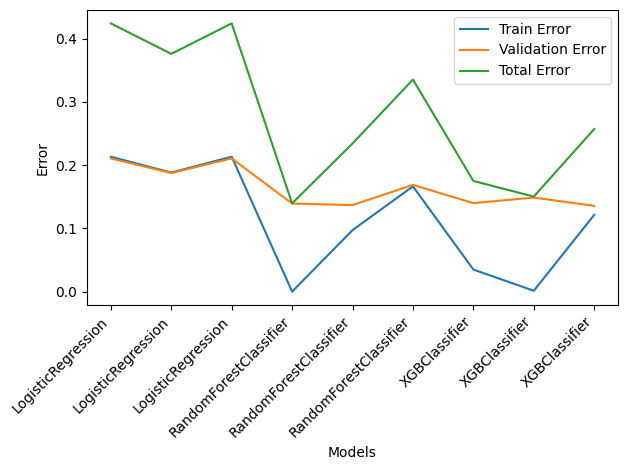

In [107]:
# Plot the bias-variance tradeoff chart for all models
x_values = range(1, len(models) + 1)
plt.plot(x_values, train_errors, label='Train Error')
plt.plot(x_values, val_errors, label='Validation Error')
plt.plot(x_values, np.add(train_errors, val_errors), label='Total Error')
plt.xticks(x_values, model_names, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()

In [108]:
# Calculate model performance metrics for the final selected model using the test dataset

In [109]:
# Train the models on the full training dataset
model9.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [110]:
# Test the models on the the test dataset
xgb_y_pred = model9.predict(X_test)

In [111]:
# Calculate and print the performance metrics of the models on the test dataset
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print("XGBoost:")
print("Accuracy:",xgb_accuracy )
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

XGBoost:
Accuracy: 0.8615
Precision: 0.7265625
Recall: 0.4732824427480916
F1 Score: 0.5731895223420647


In [112]:
# Make predictions on the training, validation, and test sets
y_pred_train = model9.predict(X_train)
y_pred_val = model9.predict(X_val)
y_pred_test = model9.predict(X_test)

# Calculate the performance metrics for the training set
train_acc = accuracy_score(y_train, y_pred_train)
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, y_pred_train)

# Calculate the performance metrics for the validation set
val_acc = accuracy_score(y_val, y_pred_val)
val_prec = precision_score(y_val, y_pred_val)
val_rec = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_val)

# Calculate the performance metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_test)

# Print the performance metrics for all three sets
print("Performance Metrics:")
print("| Metric        | Training Set | Validation Set | Test Set |")
print("|---------------|--------------|----------------|----------|")
print(f"| Accuracy      | {train_acc:.4f}       | {val_acc:.4f}         | {test_acc:.4f}   |")
print(f"| Precision     | {train_prec:.4f}       | {val_prec:.4f}         | {test_prec:.4f}   |")
print(f"| Recall        | {train_rec:.4f}       | {val_rec:.4f}         | {test_rec:.4f}   |")
print(f"| F1 Score      | {train_f1:.4f}       | {val_f1:.4f}         | {test_f1:.4f}   |")
print(f"| ROC AUC Score | {train_auc:.4f}       | {val_auc:.4f}         | {test_auc:.4f}   |")


Performance Metrics:
| Metric        | Training Set | Validation Set | Test Set |
|---------------|--------------|----------------|----------|
| Accuracy      | 0.8786       | 0.8644         | 0.8615   |
| Precision     | 0.8325       | 0.7723         | 0.7266   |
| Recall        | 0.5133       | 0.4771         | 0.4733   |
| F1 Score      | 0.6350       | 0.5898         | 0.5732   |
| ROC AUC Score | 0.7433       | 0.7205         | 0.7149   |


In [113]:
# use SMOTE to handle the imbalanced dataset

In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
# perform SMOTE oversampling on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# train the model on the resampled training set
model9.fit(X_train_resampled, y_train_resampled)

# evaluate the performance of the model on the resampled training set
y_train_pred = model9.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)

# evaluate the performance of the model on the validation set
y_val_pred = model9.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)

# evaluate the performance of the model on the test set
y_test_pred = model9.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

print("Training set: Accuracy: {}, Recall: {}, Precision: {}".format(train_accuracy, train_recall, train_precision))
print("Validation set: Accuracy: {}, Recall: {}, Precision: {}".format(val_accuracy, val_recall, val_precision))
print("Test set: Accuracy: {}, Recall: {}, Precision: {}".format(test_accuracy, test_recall, test_precision))

Training set: Accuracy: 0.8816643714341924, Recall: 0.8573676962423765, Precision: 0.9011579818031431
Validation set: Accuracy: 0.849375, Recall: 0.6666666666666666, Precision: 0.6228571428571429
Test set: Accuracy: 0.8445, Recall: 0.6717557251908397, Precision: 0.5919282511210763


In [116]:
# use SHAP to analyze feature importance

In [117]:
!pip install shap
import shap

In [118]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model9)
shap_values = explainer(X_train_resampled)
shap_values = shap.Explainer(model9).shap_values(X_train_resampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


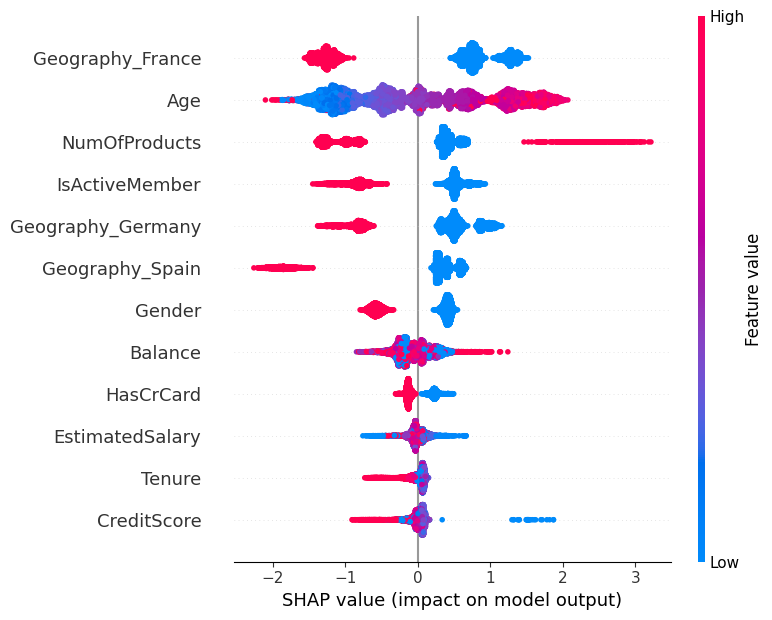

In [119]:
# a density scatter plot for feature importance
shap.summary_plot(shap_values, X_train_resampled, show=False)
# save the image
# plt.savefig('Shap_plot_02.png', bbox_inches='tight')

In [120]:
# Winning Model Deployment

In [121]:
# age and gender are in the protected category

In [122]:
# Remove 'Age' and 'Gender' features from the dataset, and retrain the winning model 

In [123]:
# Remove 'Age' and 'Gender' features from the dataset
X1 = X.drop(['Age', 'Gender'], axis=1)

# split the training set into training and test
X1_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.2, random_state=42) 

# split the training set into training and validation
X1_train, X_val, y_train, y_val = model_selection.train_test_split(X1_train, y_train, test_size=0.2, random_state=42) 

# perform SMOTE oversampling on the training set
smote = SMOTE(random_state=42)
X1_train_resampled, y_train_resampled = smote.fit_resample(X1_train, y_train)

# train the model on the resampled training set
model9.fit(X1_train_resampled, y_train_resampled)

# evaluate the performance of the model on the resampled training set
y_train_pred = model9.predict(X1_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)

# evaluate the performance of the model on the validation set
y_val_pred = model9.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)

# evaluate the performance of the model on the test set
y_test_pred = model9.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

print("Training set: Accuracy: {}, Recall: {}, Precision: {}".format(train_accuracy, train_recall, train_precision))
print("Validation set: Accuracy: {}, Recall: {}, Precision: {}".format(val_accuracy, val_recall, val_precision))
print("Test set: Accuracy: {}, Recall: {}, Precision: {}".format(test_accuracy, test_recall, test_precision))

Training set: Accuracy: 0.8426126303364155, Recall: 0.8164469801298446, Precision: 0.86153207390492
Validation set: Accuracy: 0.80375, Recall: 0.5626911314984709, Precision: 0.5183098591549296
Test set: Accuracy: 0.8105, Recall: 0.55470737913486, Precision: 0.5165876777251185


In [124]:
# Accuray, recall and precision all decreased for training, validation and test sets after dropping protected categories. 
# age and gender variables are essential for predicting customer churn